<a href="https://colab.research.google.com/github/Kochristof/Python-Data-Science/blob/main/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install scipy

In [52]:
from scipy import stats
from scipy import linalg
from scipy.linalg import eig
from scipy import optimize
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
from scipy import interpolate
from scipy import integrate
from scipy import fftpack
from scipy.spatial import distance
import numpy as np
import pandas as pd

In [2]:
# Define the DataFrame
data = {'Name': ['John', 'Jane', 'Jack', 'Jill', 'Joe', 'Joachim', 'Jackson', 'Jerry'],
        'Age': [34, 36, 29, 22, 29, 26, 27, 41]}
df = pd.DataFrame(data)

# Compute the average age
average_age = np.mean(df['Age'])
print(f"The average age is {average_age} years.")

# Test if the age distribution is normal
k2, p = stats.normaltest(df['Age'])
alpha = 0.05  # Significance level
print(f"p = {p:.5f}")
if p < alpha:
    print("The null hypothesis can be rejected; the age is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected; the age is normally distributed.")

The average age is 30.5 years.
p = 0.79019
The null hypothesis cannot be rejected; the age is normally distributed.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [3]:
# Define the DataFrame with more data
data = {
    'Name': ['John', 'Jane', 'Jack', 'Jill', 'Joe', 'Jim', 'Jerry', 'Jessica', 'Joyce', 'Jake', 'Julie', 'Jordan', 'Jasmine', 'Jeff', 'Javier', 'Jackson', 'Joshua', 'Judy', 'Jonathan', 'Jayden'],
    'Occupation': ['Teacher', 'Doctor', 'Engineer', 'Teacher', 'Engineer', 'Teacher', 'Doctor', 'Engineer', 'Doctor', 'Teacher', 'Teacher', 'Teacher', 'Engineer', 'Teacher', 'Teacher', 'Teacher', 'Nurse', 'Teacher', 'Enginer', 'Teacher'],
    'Age': [34, 36, 29, 22, 29, 45, 52, 31, 38, 47, 30, 28, 26, 40, 42, 46, 38, 49, 37, 42]
}

df = pd.DataFrame(data)

# Filter the data for only Teachers
teachers = df[df['Occupation'] == 'Teacher']

# Compute the average age of teachers
average_age = np.mean(teachers['Age'])
print(f"The average age of teachers is {average_age} years.")

# Test if the age distribution among teachers is normal
k2, p = stats.normaltest(teachers['Age'])
alpha = 0.05
print(f"p = {p:.5f}")
if p < alpha:
    print("The null hypothesis can be rejected; the age distribution is not normal.")
else:
    print("The null hypothesis cannot be rejected; the age distribution is normal.")

The average age of teachers is 38.63636363636363 years.
p = 0.48261
The null hypothesis cannot be rejected; the age distribution is normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [4]:
data = {'Vendor': ['Vendor A', 'Vendor B', 'Vendor C'],
        'Items Sold': [136, 134, 130]}

df = pd.DataFrame(data)

print(df)

mean_sales = df['Items Sold'].mean()
median_sales = df['Items Sold'].median()
mode_sales = df['Items Sold'].mode()

print(f"Mean: {mean_sales}\nMedian: {median_sales}\nMode: {mode_sales[0]}")

range_sales = df['Items Sold'].max() - df['Items Sold'].min()
std_dev_sales = df['Items Sold'].std()

print(f"Range: {range_sales}\nStandard Deviation: {std_dev_sales}")

df['Revenue Generated'] = [4200, 4050, 3900]

correlation = df['Items Sold'].corr(df['Revenue Generated'])
print(f"Correlation: {correlation}")

     Vendor  Items Sold
0  Vendor A         136
1  Vendor B         134
2  Vendor C         130
Mean: 133.33333333333334
Median: 134.0
Mode: 130
Range: 6
Standard Deviation: 3.0550504633038935
Correlation: 0.9819805060619656


In [5]:
vendor_data = {
    'Vendor': ['Vendor A', 'Vendor B', 'Vendor C', 'Vendor D', 'Vendor E'],
    'Items Sold': [1300, 1800, 1450, 1550, 1600],
    'Revenue Generated': [4000, 5500, 4500, 4800, 4950]
}

vendor_df = pd.DataFrame(vendor_data)

# Calculate mean, median, and standard deviation for each KPI
for kpi in ['Items Sold', 'Revenue Generated']:
    mean_kpi = vendor_df[kpi].mean()
    median_kpi = vendor_df[kpi].median()
    std_dev_kpi = vendor_df[kpi].std()

    print(f"{kpi}:\nMean: {mean_kpi}\nMedian: {median_kpi}\nStandard Deviation: {std_dev_kpi}\n")

correlation_sales_revenue = vendor_df['Items Sold'].corr(vendor_df['Revenue Generated'])
print(f"Correlation between Items Sold and Revenue Generated: {correlation_sales_revenue}")

Items Sold:
Mean: 1540.0
Median: 1550.0
Standard Deviation: 185.06755523321746

Revenue Generated:
Mean: 4750.0
Median: 4800.0
Standard Deviation: 554.5268253204708

Correlation between Items Sold and Revenue Generated: 0.9987827140953479


In [6]:
correlation_sales_revenue = vendor_df['Items Sold'].corr(vendor_df['Revenue Generated'])
print(f"Correlation between Items Sold and Revenue Generated: {correlation_sales_revenue}")

Correlation between Items Sold and Revenue Generated: 0.9987827140953479


In [7]:
# Setting a seed for reproducibility
np.random.seed(0)

# Creating a dataset of performance scores for Group A and Group B over 100 iterations
groupA_performance = np.random.poisson(lam=0.8, size=100)
groupB_performance = np.random.poisson(lam=0.7, size=100)

# Storing the data in a pandas DataFrame
df = pd.DataFrame({
    'GroupA': groupA_performance,
    'GroupB': groupB_performance,
})

print(df.head())

# Perform the t-test
t_stat, p_val = stats.ttest_ind(df['GroupA'], df['GroupB'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

   GroupA  GroupB
0       1       2
1       1       1
2       0       0
3       1       0
4       2       0
T-statistic: 1.769679266387656
P-value: 0.07831976705783458


In [8]:
# Known average
known_avg_value = 50

# Data samples
data_samples = np.array([55, 52, 56, 54, 51, 57, 53, 55, 56, 54])

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data_samples, known_avg_value)

print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

T-statistic:  7.20007788119872
P-value:  5.082761482024506e-05


In [9]:
# Data samples for group 1 and group 2
group1 = np.array([30, 40, 50, 60, 70])
group2 = np.array([35, 45, 55, 65, 75])

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

T-statistic:  -0.5
P-value:  0.6305360755569764


In [10]:
# Data samples for time1 and time2
time1 = np.array([10, 20, 30, 40, 50])
time2 = np.array([15, 25, 35, 45, 55])

# Perform paired sample t-test
t_statistic, p_value = stats.ttest_rel(time1, time2)

print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

T-statistic:  -inf
P-value:  0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


In [11]:
np.random.seed(0)  # Ensuring reproducibility

# Creating data for three schools
schoolA_scores = np.random.normal(85, 10, 30)  # Average=85, Std Deviation=10, Num of Students=30
schoolB_scores = np.random.normal(78, 15, 30)  # Average=78, Std Deviation=15, Num of Students=30
schoolC_scores = np.random.normal(90, 7, 30)   # Average=90, Std Deviation=7, Num of Students=30

# Creating DataFrame
df = pd.DataFrame({
    'School': ['School A']*30 + ['School B']*30 + ['School C']*30,
    'Scores': np.concatenate([schoolA_scores, schoolB_scores, schoolC_scores])
})

print(df.head())

     School      Scores
0  School A  102.640523
1  School A   89.001572
2  School A   94.787380
3  School A  107.408932
4  School A  103.675580


In [12]:
# Perform ANOVA
f_val, p_val = stats.f_oneway(df['Scores'][df['School'] == 'School A'],
                              df['Scores'][df['School'] == 'School B'],
                              df['Scores'][df['School'] == 'School C'])

print("F-value: ", f_val)
print("P-value: ", p_val)

F-value:  20.558693255186107
P-value:  4.87681642218386e-08


In [14]:
# Create a matrix of employee ages
employee_ages = np.array([[35, 42, 38],
                          [29, 31, 35],
                          [26, 27, 30]])

print(employee_ages)

# Create a matrix of years of experience
employee_experience = np.array([[10, 15, 12],
                                [7, 8, 9],
                                [4, 3, 5]])

# Add the ages and experience matrices
employee_stats = employee_ages + employee_experience
print(employee_stats)

# Create a matrix for the number of projects completed
projects_completed = np.array([[36, 33, 34],
                               [30, 32, 31],
                               [25, 29, 27]])

# Multiply matrices
total_experience = np.dot(employee_experience, projects_completed)
print(total_experience)

# Calculate the inverse of employee_ages
inverse_employee_ages = linalg.inv(employee_ages)
print(inverse_employee_ages)

# Get the transpose of employee_ages
transpose_employee_ages = employee_ages.T
print(transpose_employee_ages)

[[35 42 38]
 [29 31 35]
 [26 27 30]]
[[45 57 50]
 [36 39 44]
 [30 30 35]]
[[1110 1158 1129]
 [ 717  748  729]
 [ 359  373  364]]
[[-0.05338078 -0.83274021  1.03914591]
 [ 0.14234875  0.22064057 -0.43772242]
 [-0.08185053  0.52313167 -0.47330961]]
[[35 29 26]
 [42 31 27]
 [38 35 30]]


In [15]:
# Assume a matrix representing employee performance
employee_performance = np.array([[8, 9, 7],
                                 [9, 8, 8],
                                 [7, 7, 8]])

# Calculate the overall performance using matrix multiplication
overall_performance = np.dot(employee_ages, employee_performance)

print(overall_performance)

[[924 917 885]
 [756 754 731]
 [661 660 638]]


In [17]:
# Define a matrix
A = np.array([[2, 1], [1, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)


Eigenvalues:  [1.38196601+0.j 3.61803399+0.j]
Eigenvectors:  [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [18]:

# Define a matrix
A = np.array([[4, 1], [2, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

Eigenvalues:  [5.+0.j 2.+0.j]
Eigenvectors:  [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [19]:
# Define matrix A using Numpy arrays
A = np.array([[3, 2], [1, 1]])

# Define matrix B
B = np.array([[2], [2]])

# Solve for the variables using scipy.linalg.solve()
X = linalg.solve(A, B)

print("Solutions:\n", X)

Solutions:
 [[-2.]
 [ 4.]]


In [20]:
# Define matrix A using Numpy arrays
A = np.array([[30, 25], [28, 30]])

# Define matrix B
B = np.array([[27], [29]])

# Solve for the weights using scipy.linalg.solve()
X = linalg.solve(A, B)

print("Weights:\n", X)

Weights:
 [[0.425]
 [0.57 ]]


In [21]:
# Units for Worker A in 2021 and 2022
workerA_units = np.array([25, 27])

# Units for Worker B in 2021 and 2022
workerB_units = np.array([30, 29])

# Predict units for Worker A and Worker B for 2023
workerA_pred = np.dot(workerA_units, X)
workerB_pred = np.dot(workerB_units, X)

print("Predicted units for Worker A in 2023:", workerA_pred)
print("Predicted units for Worker B in 2023:", workerB_pred)

Predicted units for Worker A in 2023: [26.015]
Predicted units for Worker B in 2023: [29.28]


In [22]:
# Product data
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
performance = [94, 92, 91, 90, 89]  # Performance rating (out of 100)
cost = [120, 110, 105, 100, 95]  # Cost in thousands of dollars

In [25]:
# Define the coefficients of the objective function (negated for minimization)
c = [-1 * p for p in performance]

# Define the coefficients of the inequality constraints
A = [cost]

# Define the upper bound of the inequality constraints
b = [300]

# Define the bounds for the variables (0 or 1 for binary decision)
x_bounds = [(0, 1) for product in products]

# Solve the linear programming problem
res = optimize.linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Print the optimal solution
print("Optimal solution:", res.x)

Optimal solution: [ 0. -0.  1.  1.  1.]


In [26]:
# Employee data
employees = ['Alice', 'Bob', 'Charlie']
performance_task1 = [94, 88, 90]  # Performance rating for task 1
performance_task2 = [92, 91, 93]  # Performance rating for task 2

In [28]:
# Cost matrix (negated performance to maximize using linear_sum_assignment)
cost = -1 * np.array([performance_task1, performance_task2])

# Solve the assignment problem
row_ind, col_ind = linear_sum_assignment(cost)

# Print the optimal assignment
for row, col in zip(row_ind, col_ind):
    employee = employees[col]
    task = 'Task 1' if row == 0 else 'Task 2'
    print(f"{employee} assigned to {task}")

Alice assigned to Task 1
Charlie assigned to Task 2


In [29]:
# Truck data
trucks = ['Truck 1', 'Truck 2', 'Truck 3']
initial_locations = [(1, 1), (3, 2), (4, 1)]  # (x, y) coordinates
optimal_locations = [(2, 2), (4, 3), (3, 1)]

In [31]:
# Calculate distance matrix
distances = cdist(initial_locations, optimal_locations)

# Solve the assignment problem
row_ind, col_ind = linear_sum_assignment(distances)

# Print the optimal assignment and total distance
total_distance = 0
for row, col in zip(row_ind, col_ind):
    truck = trucks[row]
    destination = optimal_locations[col]
    distance = distances[row, col]
    total_distance += distance
    print(f"{truck} assigned to location {destination} with distance {distance:.2f}")

print(f"Total distance: {total_distance:.2f}")

Truck 1 assigned to location (2, 2) with distance 1.41
Truck 2 assigned to location (4, 3) with distance 1.41
Truck 3 assigned to location (3, 1) with distance 1.00
Total distance: 3.83


In [33]:
# Known data
x = np.array([3, 6, 9, 12, 15])
y = np.array([6, 15, 8, 18, 12])

f = interpolate.interp1d(x, y)

xnew = np.arange(3, 16)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
print(ynew)

[ 6.          9.         12.         15.         12.66666667 10.33333333
  8.         11.33333333 14.66666667 18.         16.         14.
 12.        ]


In [34]:
# Known data
x = np.array([3, 6, 9, 12, 15])
y = np.array([6, 15, 8, 18, 12])

f = interpolate.interp1d(x, y, kind='cubic')

xnew = np.arange(3, 16)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
print(ynew)

[ 6.         13.83333333 16.22222222 15.         12.          9.05555556
  8.         10.05555556 14.         18.         20.22222222 18.83333333
 12.        ]


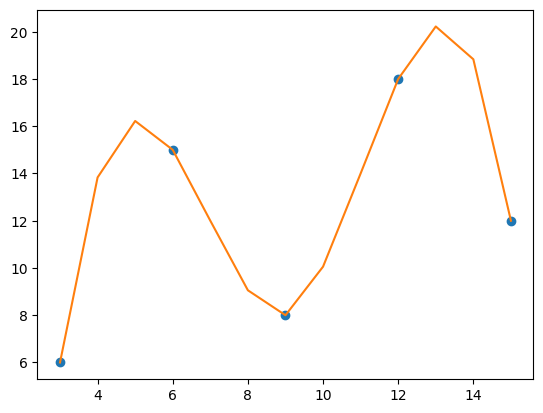

In [35]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

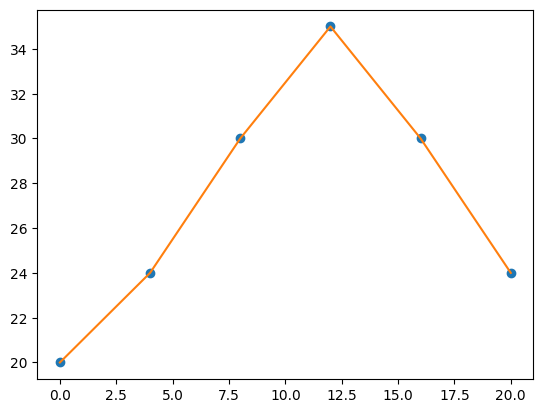

In [36]:
# Given data
x = np.array([0, 4, 8, 12, 16, 20])
y = np.array([20, 24, 30, 35, 30, 24])

# Interpolate
f = interpolate.interp1d(x, y)

# New time values
xnew = np.arange(0, 21)
ynew = f(xnew)

# Plot
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

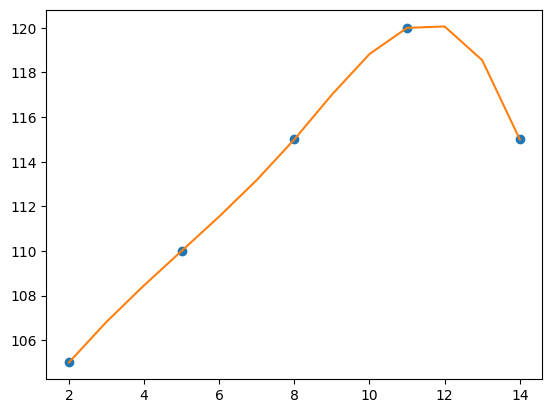

In [37]:
# Given data
x = np.array([2, 5, 8, 11, 14])
y = np.array([105, 110, 115, 120, 115])

# Cubic Interpolation
f = interpolate.interp1d(x, y, kind='cubic')

# New week numbers
xnew = np.arange(2, 15)
ynew = f(xnew)

# Plot
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [39]:
def runner_speed(t):
    """
    This function represents a hypothetical speed-time graph of a runner in m/s.
    The speed varies as a function of time due to the runner's sprinting and resting periods.
    """
    return 3 * np.sin(t) + 3

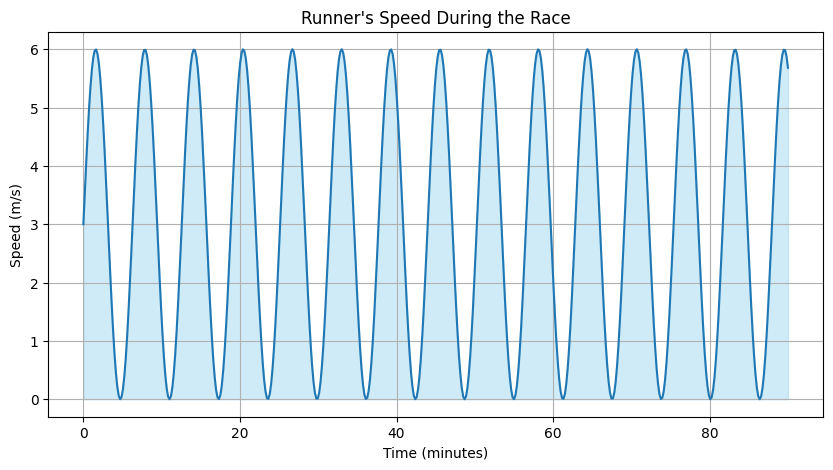

In [40]:
t = np.linspace(0, 90, 500)  # represents the time in minutes for a standard race
speed = runner_speed(t)

plt.figure(figsize=(10, 5))
plt.plot(t, speed)
plt.fill_between(t, speed, color="skyblue", alpha=0.4)
plt.title("Runner's Speed During the Race")
plt.xlabel("Time (minutes)")
plt.ylabel("Speed (m/s)")
plt.grid(True)
plt.show()

In [41]:
result, error = integrate.quad(runner_speed, 0, 90)
print(f"The runner has covered {result:.2f} meters during the race.")

The runner has covered 274.34 meters during the race.


In [42]:
def car_speed(t):
    """
    This function represents a hypothetical speed-time graph of a car during a race.
    The speed varies as a cubic function of time.
    """
    return 5*t**3 + 2*t

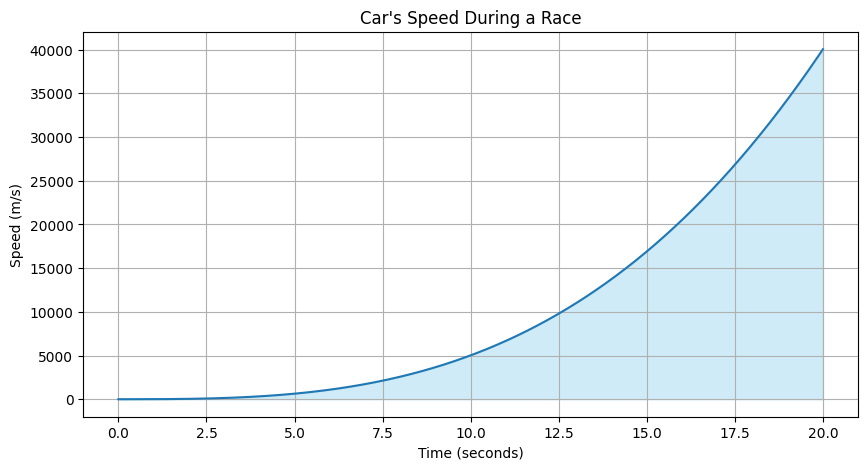

In [43]:
t = np.linspace(0, 20, 1000)  # represents time in seconds
speed = car_speed(t)

plt.figure(figsize=(10, 5))
plt.plot(t, speed)
plt.fill_between(t, speed, color="skyblue", alpha=0.4)
plt.title("Car's Speed During a Race")
plt.xlabel("Time (seconds)")
plt.ylabel("Speed (m/s)")
plt.grid(True)
plt.show()

In [44]:
result, error = integrate.quad(car_speed, 0, 20)
print(f"The car has covered {result:.2f} meters during the race.")

The car has covered 200400.00 meters during the race.


In [47]:
np.random.seed(0)
days = np.arange(1, 201)
sales = np.random.poisson(lam=2, size=200)

plt.figure(figsize=(14, 7))
plt.stem(days, sales, use_line_collection=True)
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Number of Items Sold over 200 Days')
plt.grid(True)
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1400x700 with 0 Axes>

In [48]:
#Compute the one-dimensional n-point discrete Fourier Transform
sales_fft = fftpack.fft(sales)

# Compute the frequencies associated with the Fourier Transform
frequencies = fftpack.fftfreq(len(sales))

# Plot the absolute value of the Fourier Transform
plt.figure(figsize=(14, 7))
plt.stem(frequencies, np.abs(sales_fft), use_line_collection=True)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation of Sales')
plt.grid(True)
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1400x700 with 0 Axes>

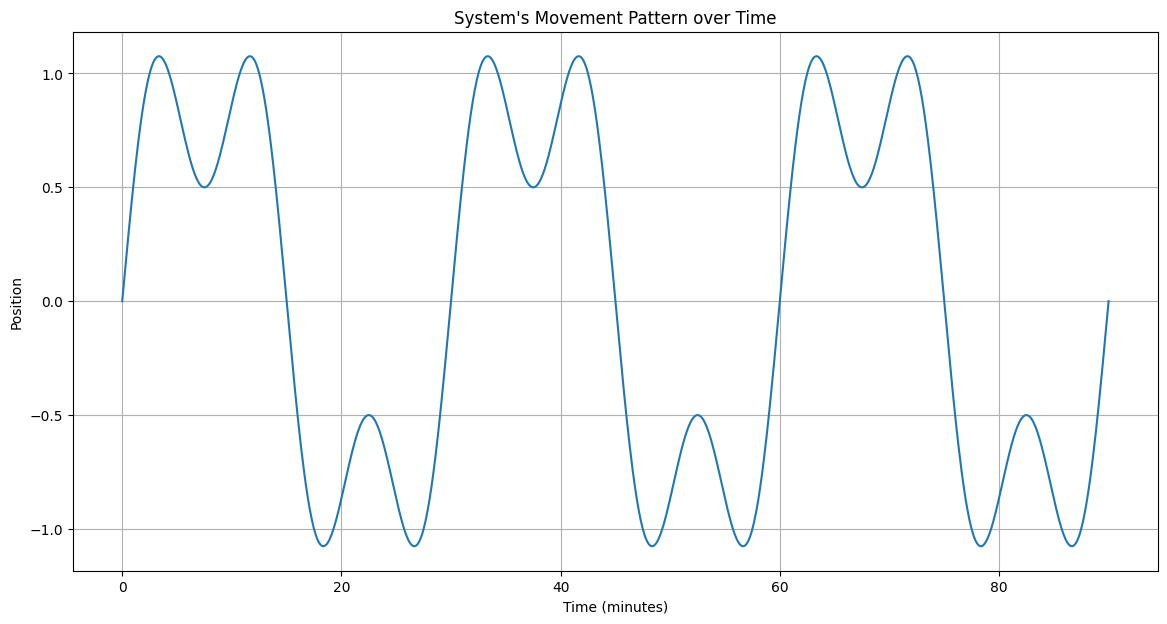

In [49]:
# Time array
t = np.linspace(0.0, 90.0, num=1000)

# Create a sinusoidal movement pattern for the system
position = np.sin(2.0*np.pi*1/30*t) + 0.5*np.sin(2.0*np.pi*1/10*t)

# Plot the system's movement over time
plt.figure(figsize=(14, 7))
plt.plot(t, position)
plt.xlabel('Time (minutes)')
plt.ylabel('Position')
plt.title('System\'s Movement Pattern over Time')
plt.grid(True)
plt.show()

In [50]:
# Compute the one-dimensional n-point discrete Fourier Transform
position_fft = fftpack.fft(position)

# Compute the frequencies associated with the Fourier Transform
frequencies = fftpack.fftfreq(len(position), d=t[1]-t[0])

# Plot the absolute value of the Fourier Transform
plt.figure(figsize=(14, 7))
plt.stem(frequencies[:500], np.abs(position_fft[:500]), use_line_collection=True)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation of the System\'s Movement')
plt.grid(True)
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1400x700 with 0 Axes>

In [51]:
# The positions are recorded as (x, y) coordinates
bird_positions = np.array([(10, 20), (15, 22), (16, 23), (20, 27), (24, 29)])

print("Bird positions:", bird_positions)

Bird positions: [[10 20]
 [15 22]
 [16 23]
 [20 27]
 [24 29]]


In [53]:
# Another set of bird positions
bird_positions_2 = np.array([(50, 60), (52, 61), (53, 63), (55, 65), (57, 67)])

direct_distance = distance.cdist(bird_positions, bird_positions_2, 'euclidean')
print("Direct distance between the bird sightings:\n", direct_distance)

Direct distance between the bird sightings:
 [[56.56854249 58.69412236 60.81118318 63.63961031 66.46803743]
 [51.66236541 53.75872022 55.90169944 58.72818744 61.55485359]
 [50.24937811 52.34500931 54.4885309  57.31491952 60.14149982]
 [44.59820624 46.69047012 48.83646179 51.66236541 54.4885309 ]
 [40.45985665 42.52058325 44.68780594 47.50789408 50.32891813]]


In [54]:
bird_movement_manhattan = distance.pdist(bird_positions, 'cityblock')

print("Total movement for the birds (Manhattan): ", np.sum(bird_movement_manhattan))

Total movement for the birds (Manhattan):  112.0
